In [81]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [82]:
model = InceptionV3(weights='imagenet')

model.summary()

                 
__________________________________________________________________________________________________
batch_normalization_157 (BatchN (None, 17, 17, 192)  576         conv2d_157[0][0]                 
__________________________________________________________________________________________________
batch_normalization_162 (BatchN (None, 17, 17, 192)  576         conv2d_162[0][0]                 
__________________________________________________________________________________________________
batch_normalization_163 (BatchN (None, 17, 17, 192)  576         conv2d_163[0][0]                 
__________________________________________________________________________________________________
activation_154 (Activation)     (None, 17, 17, 192)  0           batch_normalization_154[0][0]    
__________________________________________________________________________________________________
activation_157 (Activation)     (None, 17, 17, 192)  0           batch_normalization_157[0]

In [83]:
import matplotlib.pyplot as plt  
# % matplotlib qt 
ORIGINAL = 'E:GRAD-CAM\elephant.jpg'
DIM = 299
img = cv2.imread(ORIGINAL,  cv2.IMREAD_UNCHANGED)
# resize image
img = cv2.resize(img, (299,299), interpolation = cv2.INTER_AREA)
print(img.shape)
 
# cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

(299, 299, 3)


In [84]:
# preprocess_input function provided by tf.keras .
x = np.asarray(img)
# x = np.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(decode_predictions(preds))

[[('n02504013', 'Indian_elephant', 0.982777), ('n01871265', 'tusker', 0.009348248), ('n01694178', 'African_chameleon', 0.000327752), ('n02504458', 'African_elephant', 0.00016881655), ('n02951585', 'can_opener', 0.00010663965)]]


In [ ]:
#  1) Wewill create a model (which behaves as a function) that takes as input an image (model.inputs) and outputs a list of the output of the model and the output of the final convolutional layer ([model.output, last_conv_layer.output]) for later use.
#  2) Find the index of the winning class in the model output.

In [86]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('conv2d_187')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

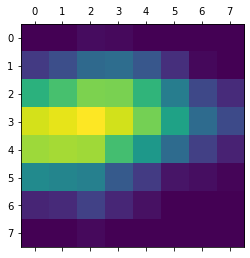

In [87]:
# Now let’s visualize our heatmap. To do this, we will bring all the values between 0 and 1 and also reshape it to be an 8x8array.
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((8, 8))
plt.matshow(heatmap)
plt.show()
# heatmap = heatmap.reshape((8, 8))

In [101]:
# Now let’s cover the image with the heatmap. First, we load the image.
img = cv2.imread(ORIGINAL,1)
img.shape

img.shape

(450, 600, 3)

In [108]:
# Next, we resize the heatmap to match the shape of the image, so that it can properly impose it
# Next, we use cv2.applyColorMapto apply the heatmap to our image (we multiply by 255to convert it into RGB form)
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY + img

img.shape

(450, 600, 3)

In [109]:
# cv2.imshow(cv2.imread(ORIGINAL))
# cv2.imshow(img)
# cv2.imshow("Resized image", cv2.imread(ORIGINAL))
cv2.imshow("Resized image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()